In [2]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
url="https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
gdf=gpd.read_file(url)
gdf.head()

c:\Users\AKHTAR HUSSAIN\anaconda3\Lib\site-packages\pandas\core\computation\expressions.py:22: UserWarning: Pandas requires version '2.10.2' or newer of 'numexpr' (version '2.8.4' currently installed).
  from pandas.core.computation.check import NUMEXPR_INSTALLED


,fid,height_MS,height_FM,height_avg,SQMETERS,STATEFP,NAME,geometry
0,2,15.05,23.30,19.18,6365.72,36,New York,"POLYGON ((-74.00129 40.71992, -74.00061 40.719..."
1,4,23.62,46.18,34.90,3287.84,36,New York,"POLYGON ((-74.0032 40.71654, -74.00265 40.7163..."
2,5,19.98,109.60,64.79,2011.21,36,New York,"POLYGON ((-74.01415 40.70324, -74.01342 40.703..."
3,9,18.50,18.18,18.34,3110.32,36,New York,"POLYGON ((-73.98974 40.71924, -73.98924 40.720..."
4,34,21.53,32.84,27.18,5240.89,36,New York,"POLYGON ((-74.00941 40.72351, -74.00816 40.723..."


Task 1: Loading NYC buildings dataset...
✓ Loaded 1206 buildings
Columns: ['fid', 'height_MS', 'height_FM', 'height_avg', 'SQMETERS', 'STATEFP', 'NAME', 'geometry']
First 5 rows:
   fid  height_MS  height_FM  height_avg  SQMETERS STATEFP      NAME  \
0    2      15.05      23.30       19.18   6365.72      36  New York   
1    4      23.62      46.18       34.90   3287.84      36  New York   
2    5      19.98     109.60       64.79   2011.21      36  New York   
3    9      18.50      18.18       18.34   3110.32      36  New York   
4   34      21.53      32.84       27.18   5240.89      36  New York   

                                            geometry  
0  POLYGON ((-74.00129 40.71992, -74.00061 40.719...  
1  POLYGON ((-74.0032 40.71654, -74.00265 40.7163...  
2  POLYGON ((-74.01415 40.70324, -74.01342 40.703...  
3  POLYGON ((-73.98974 40.71924, -73.98924 40.720...  
4  POLYGON ((-74.00941 40.72351, -74.00816 40.723...  

Task 2: Creating static plot...
✓ Saved: task2_nyc_buildi

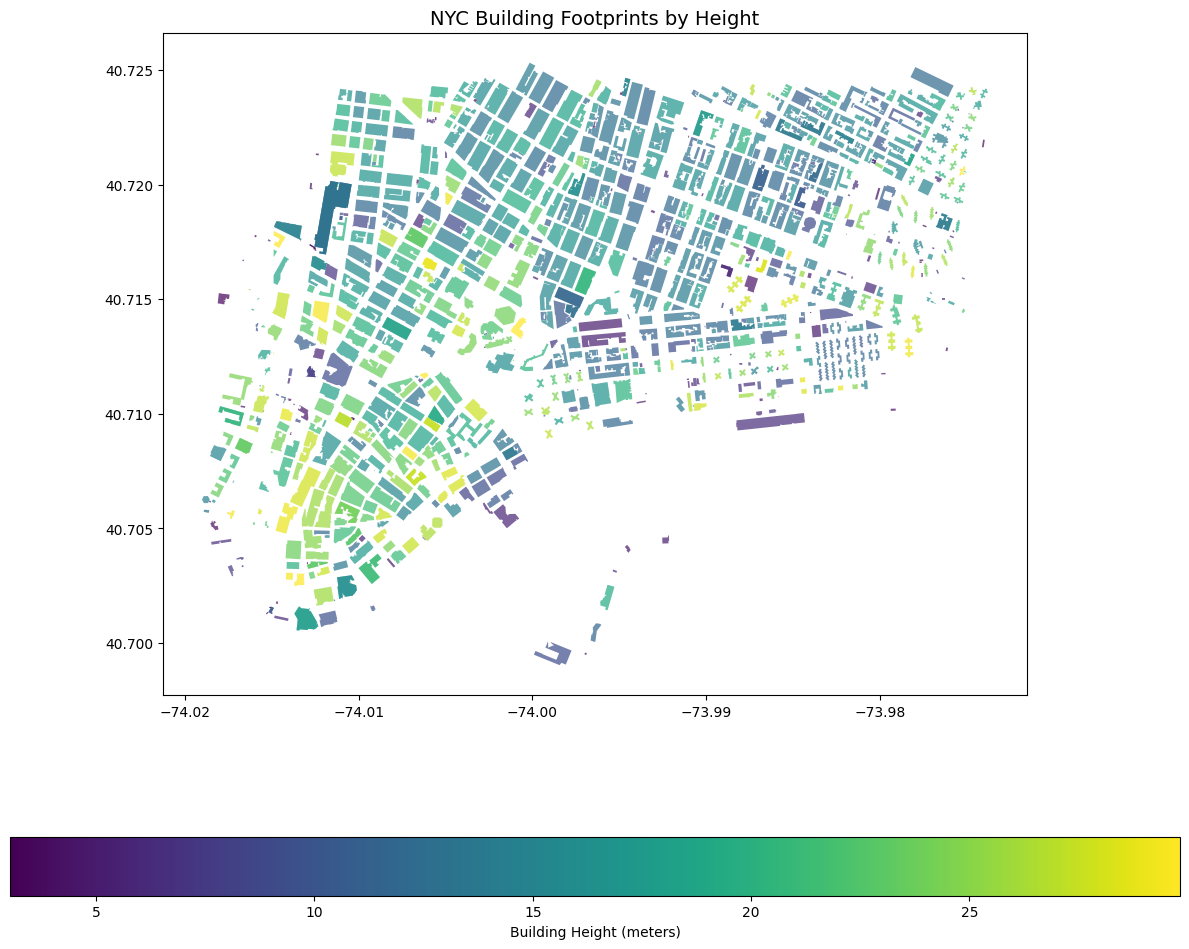


Task 3: Creating interactive map...


TypeError: '<=' not supported between instances of 'NoneType' and 'float'

In [3]:
"""
Exercise 16.14.1: GeoDataFrames with GeoPandas
Complete solution for all 6 tasks
"""

import geopandas as gpd
import matplotlib.pyplot as plt
import folium
import branca.colormap as cm

# ============================================================
# TASK 1: Load the NYC building dataset
# ============================================================
print("Task 1: Loading NYC buildings dataset...")

url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
gdf = gpd.read_file(url)

print(f"✓ Loaded {len(gdf)} buildings")
print(f"Columns: {list(gdf.columns)}")
print(f"First 5 rows:\n{gdf.head()}")


# ============================================================
# TASK 2: Create a static plot colored by building height
# ============================================================
print("\nTask 2: Creating static plot...")

fig, ax = plt.subplots(figsize=(12, 10))

gdf.plot(
    column='height_MS',
    cmap='viridis',
    legend=True,
    legend_kwds={'label': "Building Height (meters)", 'orientation': "horizontal"},
    ax=ax,
    alpha=0.7
)

ax.set_title('NYC Building Footprints by Height', fontsize=14)
plt.tight_layout()
plt.savefig('task2_nyc_buildings_static.png', dpi=300)
print("✓ Saved: task2_nyc_buildings_static.png")
plt.show()


# ============================================================
# TASK 3: Create an interactive map colored by building height
# ============================================================
print("\nTask 3: Creating interactive map...")

# Get map center
bounds = gdf.total_bounds
center_lat = (bounds[1] + bounds[3]) / 2
center_lon = (bounds[0] + bounds[2]) / 2

# Create map
m = folium.Map(
    location=[center_lat, center_lon],
    zoom_start=14,
    tiles='CartoDB positron'
)

# Create color scale
min_height = gdf['height_MS'].min()
max_height = gdf['height_MS'].max()
colormap = cm.linear.viridis.scale(min_height, max_height)
colormap.caption = 'Building Height (meters)'

# Style function
def style_function(feature):
    height = feature['properties']['height_MS']
    return {
        'fillColor': colormap(height),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7
    }

# Add buildings
folium.GeoJson(
    gdf,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['height_MS'],
        aliases=['Height (m):']
    )
).add_to(m)

colormap.add_to(m)
m.save('task3_nyc_buildings_interactive.html')
print("✓ Saved: task3_nyc_buildings_interactive.html")


# ============================================================
# TASK 4: Calculate average building height
# ============================================================
print("\nTask 4: Calculating average height...")

average_height = gdf['height_MS'].mean()
print(f"✓ Average building height: {average_height:.2f} meters")


# ============================================================
# TASK 5: Select buildings taller than average
# ============================================================
print("\nTask 5: Selecting tall buildings...")

tall_buildings = gdf[gdf['height_MS'] > average_height]

print(f"✓ Buildings taller than average: {len(tall_buildings)}")
print(f"  (out of {len(gdf)} total buildings)")

# Optional: plot them
fig, ax = plt.subplots(figsize=(10, 8))
tall_buildings.plot(column='height_MS', cmap='Reds', legend=True, ax=ax)
ax.set_title(f'Buildings Taller Than Average ({average_height:.1f}m)')
plt.savefig('task5_tall_buildings.png')
print("✓ Saved: task5_tall_buildings.png")


# ============================================================
# TASK 6: Save GeoDataFrame to new GeoJSON file
# ============================================================
print("\nTask 6: Saving to GeoJSON...")

output_file = 'task6_nyc_buildings.geojson'
gdf.to_file(output_file, driver='GeoJSON')

print(f"✓ Saved: {output_file}")
print(f"\n{'='*50}")
print("ALL TASKS COMPLETED!")
print(f"{'='*50}")

In [ ]:
import geopandas as gpd
import folium
import branca.colormap as cm
import numpy as np
from folium.plugins import Fullscreen

# Step 1: Load data
url = "https://github.com/opengeos/datasets/releases/download/places/nyc_buildings.geojson"
gdf = gpd.read_file(url)

# Step 2: Data preprocessing
# Remove buildings with no height data
gdf_clean = gdf.dropna(subset=['height_MS']).copy()
print(f"Removed {len(gdf) - len(gdf_clean)} buildings with missing height")

# Simplify geometries for better performance (adjust tolerance as needed)
# 0.0001 degrees ≈ 11 meters at NYC latitude
gdf_clean['geometry'] = gdf_clean.simplify(tolerance=0.0001, preserve_topology=True)

# Step 3: Create map centered on data
bounds = gdf_clean.total_bounds
center = [(bounds[1] + bounds[3]) / 2, (bounds[0] + bounds[2]) / 2]

m = folium.Map(
    location=center,
    zoom_start=14,
    tiles='CartoDB positron'
)

# Step 4: Create quantile-based color scale for better visualization
# This ensures colors are distributed across the data range, not just min-max
quantiles = gdf_clean['height_MS'].quantile([0, 0.25, 0.5, 0.75, 0.95, 1.0]).tolist()

colormap = cm.StepColormap(
    colors=['#440154', '#31688e', '#35b779', '#fde725', '#ff4444'],  # Purple to Red
    index=quantiles,
    vmin=quantiles[0],
    vmax=quantiles[-1],
    caption='Building Height (meters) - Percentile Classes'
)

# Step 5: Style function with error handling
def style_function(feature):
    props = feature['properties']
    height = props.get('height_MS')
    
    # Handle missing or invalid data
    if height is None or (isinstance(height, float) and np.isnan(height)):
        return {
            'fillColor': '#888888',
            'color': 'black',
            'weight': 0.3,
            'fillOpacity': 0.2
        }
    
    return {
        'fillColor': colormap(height),
        'color': 'black',
        'weight': 0.5,
        'fillOpacity': 0.7
    }

# Step 6: Add GeoJson layer with rich tooltips
geojson_layer = folium.GeoJson(
    gdf_clean,
    style_function=style_function,
    tooltip=folium.GeoJsonTooltip(
        fields=['height_MS'],
        aliases=['Height:'],
        localize=True,
        sticky=True,  # Tooltip follows mouse
        labels=True,
        style="""
            background-color: #F0EFEF;
            border: 2px solid black;
            border-radius: 3px;
            box-shadow: 3px;
        """
    ),
    popup=folium.GeoJsonPopup(
        fields=['height_MS'],
        aliases=['Building Height (m):'],
        localize=True,
        labels=True
    ),
    highlight_function=lambda x: {
        'fillOpacity': 0.9,
        'weight': 2
    },
    name='Buildings'
).add_to(m)

# Step 7: Add controls
colormap.add_to(m)
Fullscreen().add_to(m)  # Add fullscreen button
folium.LayerControl().add_to(m)

# Step 8: Save
output_file = 'nyc_buildings_enhanced.html'
m.save(output_file)
print(f"\n✓ Enhanced interactive map saved: {output_file}")
print(f"  - Buildings shown: {len(gdf_clean):,}")
print(f"  - Height range: {gdf_clean['height_MS'].min():.1f}m to {gdf_clean['height_MS'].max():.1f}m")
print(f"  - Color classes (quantiles): {[f'{q:.1f}m' for q in quantiles]}")

Removed 89 buildings with missing height

✓ Enhanced interactive map saved: nyc_buildings_enhanced.html
  - Buildings shown: 1,117
  - Height range: 3.0m to 29.8m
  - Color classes (quantiles): ['3.0m', '11.3m', '14.9m', '20.0m', '26.9m', '29.8m']


In [ ]:
# Option A: Show only buildings taller than threshold
tall_only = gdf_clean[gdf_clean['height_MS'] > gdf_clean['height_MS'].quantile(0.8)]
# Use tall_only in folium.GeoJson

# Option B: Convert to centroid points with circle markers
m = folium.Map(location=center, zoom_start=14)
for idx, row in gdf_clean.iterrows():
    centroid = row.geometry.centroid
    folium.CircleMarker(
        location=[centroid.y, centroid.x],
        radius=max(3, min(20, row['height_MS']/5)),  # Size based on height
        color=colormap(row['height_MS']),
        fill=True,
        fill_opacity=0.7,
        popup=f"Height: {row['height_MS']:.1f}m"
    ).add_to(m)

NameError: name 'gdf_clean' is not defined